In [44]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt


In [45]:
nycrash_df = pd.read_csv('Motor_Vehicle_Crashes_-_Case_Information__Three_Year_Window.csv')
nycrash_df.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2014,Injury Accident,5:35,06/18/2014,Wednesday,Y,Dawn,NEW YORK,OTHER,NEW YORK,Straight and Level,Clear,None,Dry,NaN,"Crossing, No Signal or Crosswalk","Pedestrian, Collision With",1
1,2014,Property Damage Accident,15:28,11/06/2014,Thursday,Y,Daylight,HENRIETTA,RIGHT ANGLE,MONROE,Straight and Level,Rain,None,Wet,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2014,Property Damage Accident,15:27,03/19/2014,Wednesday,Y,Daylight,CICERO,OVERTAKING,ONONDAGA,Straight and Level,Cloudy,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
3,2014,Property Damage Accident,4:03,06/23/2014,Monday,Y,Dark-Road Unlighted,COLESVILLE,OTHER,BROOME,Straight and Grade,Clear,None,Dry,88I91011017,Not Applicable,Deer,1
4,2014,Property Damage Accident,15:28,09/27/2014,Saturday,Y,Daylight,HECTOR,OTHER,SCHUYLER,Straight and Level,Cloudy,None,Dry,79 63061019,Not Applicable,Deer,1


In [46]:
nycrash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895916 entries, 0 to 895915
Data columns (total 18 columns):
Year                             895916 non-null int64
Crash Descriptor                 895916 non-null object
Time                             895916 non-null object
Date                             895916 non-null object
Day of Week                      895916 non-null object
Police Report                    895916 non-null object
Lighting Conditions              895916 non-null object
Municipality                     883939 non-null object
Collision Type Descriptor        895916 non-null object
County Name                      895916 non-null object
Road Descriptor                  895916 non-null object
Weather Conditions               895916 non-null object
Traffic Control Device           895916 non-null object
Road Surface Conditions          895916 non-null object
DOT Reference Marker Location    313601 non-null object
Pedestrian Bicyclist Action      895916 non-null o

In [47]:
nycrash_counts = nycrash_df.groupby(['Year', 'Municipality'])['Police Report'].agg(
    ['count']).reset_index().sort_values(by= ['Year', 'count'], ascending = False)
nycrash_counts


,Year,Municipality,count
3512,2016,QUEENS,21673
3145,2016,KINGS,20987
3066,2016,HEMPSTEAD,13721
3340,2016,NEW YORK,12478
2690,2016,BRONX,11478
...,...,...,...
288,2014,DELANSON,1
722,2014,MONTAGUE,1
814,2014,OCEAN BEACH,1
1008,2014,SALTAIRE,1


In [48]:
ny_yr_counts = nycrash_df.groupby(['Year'])['Police Report'].agg(
    ['count']).reset_index().sort_values(by= ['Year', 'count'], ascending = True)
ny_yr_counts

,Year,count
0,2014,299452
1,2015,294556
2,2016,301908


In [49]:
ny_crash_avg = nycrash_counts.groupby(['Municipality']).mean().sort_values(by= ['count'], ascending = False)
ny_crash_avg

,Year,count
Municipality,,
QUEENS,2015.0,19958.333333
KINGS,2015.0,19537.000000
HEMPSTEAD,2015.0,13720.333333
NEW YORK,2015.0,11920.000000
BRONX,2015.0,10803.666667
...,...,...
ALTMAR,2014.5,1.000000
AMES,2014.0,1.000000
SALTAIRE,2014.0,1.000000


In [50]:
# Top 10 Municipalities with the highest accident percentage 
top10 = ny_crash_avg.iloc[0:10].reset_index()
top10

,Municipality,Year,count
0,QUEENS,2015.0,19958.333333
1,KINGS,2015.0,19537.000000
2,HEMPSTEAD,2015.0,13720.333333
3,NEW YORK,2015.0,11920.000000
4,BRONX,2015.0,10803.666667
5,BROOKHAVEN,2015.0,8358.000000
6,ISLIP,2015.0,6716.666667
7,OYSTER BAY,2015.0,5870.666667
8,BUFFALO,2015.0,5235.666667
9,ROCHESTER,2015.0,4989.333333


## Bar chart to show top 5 municipalities for crashes

In [51]:
nycrash_counts

,Year,Municipality,count
3512,2016,QUEENS,21673
3145,2016,KINGS,20987
3066,2016,HEMPSTEAD,13721
3340,2016,NEW YORK,12478
2690,2016,BRONX,11478
...,...,...,...
288,2014,DELANSON,1
722,2014,MONTAGUE,1
814,2014,OCEAN BEACH,1
1008,2014,SALTAIRE,1


In [52]:
mx = nycrash_counts.set_index(['Year', 'Municipality'])
mx

count
Year Municipality       
2016 QUEENS        21673
     KINGS         20987
     HEMPSTEAD     13721
     NEW YORK      12478
     BRONX         11478
...                  ...
2014 DELANSON          1
     MONTAGUE          1
     OCEAN BEACH       1
     SALTAIRE          1
     WORTH             1

[3853 rows x 1 columns]

In [53]:
year_groups = nycrash_counts.groupby('Year')
year_grp_lst = []
for year in year_groups:
    year_grp_lst.append(year[1].iloc[:5])
#mx.reset_index(level=0).iloc[:5,:]

mx = pd.concat(year_grp_lst).set_index(['Year'])
mx

,Municipality,count
Year,,
2014,QUEENS,19976
2014,KINGS,19740
2014,HEMPSTEAD,13706
2014,NEW YORK,11833
2014,BRONX,10839
2015,QUEENS,18226
2015,KINGS,17884
2015,HEMPSTEAD,13734
2015,NEW YORK,11449


In [54]:
mx_pivot = mx.pivot( columns='Municipality', values=['count'])
mx_pivot

count                                 
Municipality  BRONX HEMPSTEAD  KINGS NEW YORK QUEENS
Year                                                
2014          10839     13706  19740    11833  19976
2015          10094     13734  17884    11449  18226
2016          11478     13721  20987    12478  21673

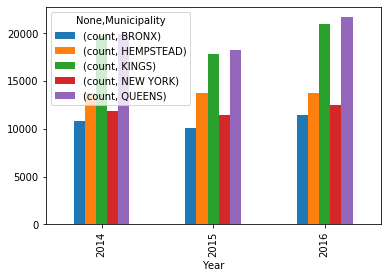

In [55]:

mx_pivot.plot.bar();

In [79]:
sort_nycrash_counts = nycrash_counts.set_index(['Year', 'Municipality'])
sort_nycrash_counts.reset_index()

,Year,Municipality,count
0,2016,QUEENS,21673
1,2016,KINGS,20987
2,2016,HEMPSTEAD,13721
3,2016,NEW YORK,12478
4,2016,BRONX,11478
...,...,...,...
3848,2014,DELANSON,1
3849,2014,MONTAGUE,1
3850,2014,OCEAN BEACH,1
3851,2014,SALTAIRE,1


In [85]:
avg_acc_year = nycrash_counts.groupby(['Year']).mean()
avg_acc_year

,count
Year,
2014,229.709953
2015,225.727414
2016,232.812159


In [86]:
avg_acc_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2014 to 2016
Data columns (total 1 columns):
count    3 non-null float64
dtypes: float64(1)
memory usage: 48.0 bytes


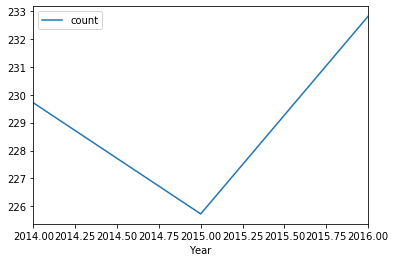

In [87]:
# cx = avg_acc_year.plot("Year", 'count', linewidth=2.0)
cx = avg_acc_year.plot( y='count', kind = 'line')
cx


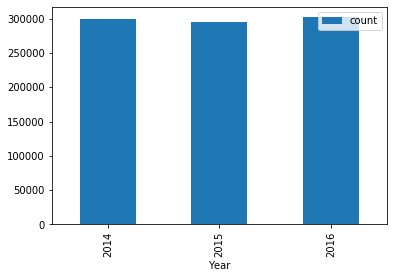

In [66]:
ax = ny_yr_counts.plot.bar(x='Year', y='count')

plt.show()

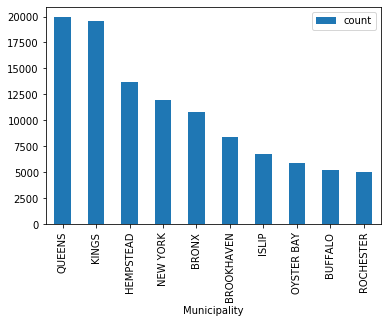

In [60]:
bx = top10.plot.bar(x='Municipality', y='count')

plt.show()